## Parte 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

%matplotlib inline

from IPython.display import YouTubeVideo, display
from skimage import io 

from urllib.error import HTTPError 

## Parte 2
Cargar el archivo .csv en un dataframe

Inspeccionar el dataframe

Mostrar los primeros 5 videos


In [2]:
df=pd.read_csv("data/USvideos.csv")
df.head(2)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."


2kyS6SvSYSE


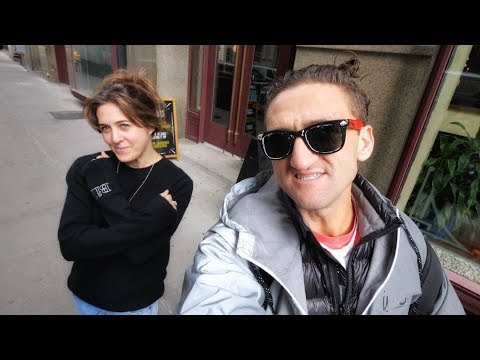

1ZAPwfrtAFY


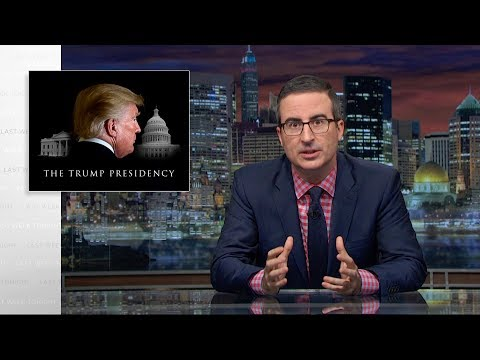

5qpjK5DgCt4


puqaWrEC7tY


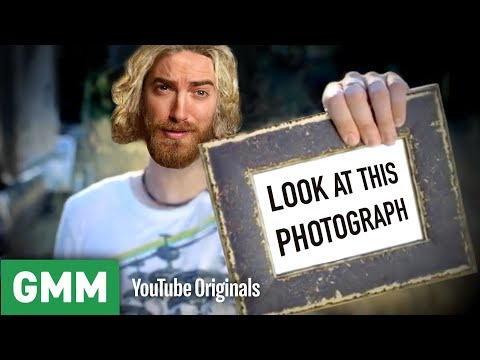

d380meD0W0M


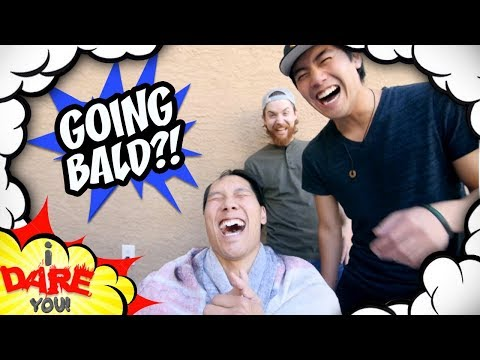

In [3]:
videos=df[0:5]["video_id"]
for video in videos:
    print(video)
    v=YouTubeVideo(video) 
    display(v)

## Parte 3
Mostrar las primeras 21 imágenes en una malla de 3 filas x 7 columnas

No mostrar los ejes

Mostrar el título de cada video (10 caracteres)

Mostrar las imágenes en blanco y negro

En caso de que la foto no exista, mostrar el siguiente “Warning” (advertencia) a color

http://www.dagdrivarn.se/BILDER/stambilder/MISSING.jpg


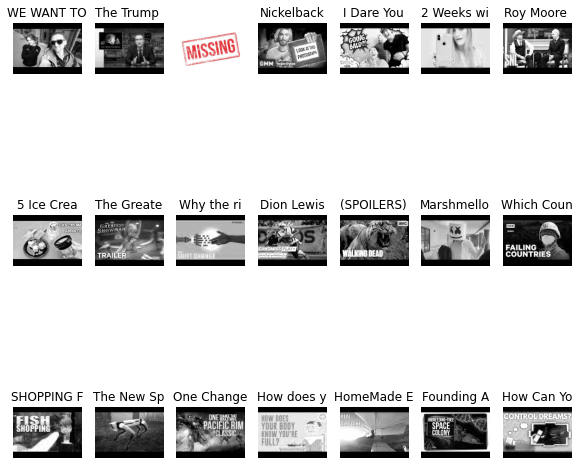

In [4]:
fotos=list(df[:21]["thumbnail_link"]) 
nombres=list(df[:21]["title"])
fig, axs= plt.subplots(3,7, figsize=(10,10))
for ax, link, nombre in zip(axs.flatten(),fotos,nombres):
    try:
        ax.imshow(io.imread(link)[:,:,0],cmap="gray") 
        ax.set_title(nombre[:10])
        ax.axis("off")
    except:
        ax.imshow(io.imread("http://www.dagdrivarn.se/BILDER/stambilder/MISSING.jpg"))
        ax.axis("off")

## Parte 4
Mostrar la columna “tags” (etiquetas)

Los tags están separados por una barra vertical

Crear una nueva columna con el nombre “tag_conteo” que enumere los tags (etiquetas) que contiene cada video

“sports|mexico|news" tendría 3 tags


In [5]:
df["tags"].head(2)

0                                      SHANtell martin
1    last week tonight trump presidency|"last week ...
Name: tags, dtype: object

In [6]:
df["tag_conteo"]=df["tags"].apply(lambda x:x.count("|")+1)

In [7]:
df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,tag_conteo
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,1
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",4


## Crear una nueva columna con nombre “Likes”
Likes contendrá los booleanos “True” y “False”

Será “True” si el número de Likes supera al número de “Dislikes”

En caso contrario será “False”


In [8]:
df["bol"]=df.apply(lambda x:True if x.likes>x.dislikes else False, axis=1)
df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,tag_conteo,bol
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,1,True
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",4,True


## Parte 6
Convertir el archivo .json en un dataframe

Revisar el “antes" y “después" en las imágenes


In [9]:
import json
with open("data/US_category_id.json", "r") as f:data=json.loads(f.read())
data

{'items': [{'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Pets & Animals',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2ysk

In [10]:
data2=pd.json_normalize(data,record_path=["items"])
data2.head()

,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable
0,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True


In [11]:
data2=data2[["id","snippet.title"]]
data2=data2.rename(columns={"id":"category_id","snippet.title":"category_title"})
data2

,category_id,category_title
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


## Parte 7

Combinar el dataframe original (.csv) con el nuevo dataframe (.json)

Mantener solamente las siguientes columnas:


In [12]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,tag_conteo,bol
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,1,True
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",4,True
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,23,True
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,27,True
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,14,True


In [13]:
data2["category_id"]=data2["category_id"].apply(pd.to_numeric)
df=df.merge(data2, how="inner", left_on="category_id", right_on="category_id")
df



,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,tag_conteo,bol,category_title
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,1,True,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,4,True,People & Blogs
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,44,True,People & Blogs
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,12,True,People & Blogs
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,25,True,People & Blogs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,V6ElE2xs48c,18.02.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1324482,22413,608,1644,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",33,True,Shows
40945,V6ElE2xs48c,18.03.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1332252,22461,610,1648,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",33,True,Shows
40946,V6ElE2xs48c,18.04.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1340039,22504,615,1648,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",33,True,Shows
40947,V6ElE2xs48c,18.05.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1345086,22542,615,1649,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",33,True,Shows


In [14]:
df=df[['title','channel_title','category_title','views','likes','dislikes','comment_count','description','tag_conteo','bol']]
df


,title,channel_title,category_title,views,likes,dislikes,comment_count,description,tag_conteo,bol
0,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,748374,57527,2966,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...,1,True
1,Me-O Cats Commercial,Nobrand,People & Blogs,98966,2486,184,532,Kittens come out of the eggs in a Thai commerc...,4,True
2,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,People & Blogs,321053,4451,1772,895,Subscribe for weekly videos ▶ http://bit.ly/sj...,44,True
3,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,People & Blogs,197062,7250,217,456,Molly is an god damn amazing human and she cha...,12,True
4,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,People & Blogs,2744430,115426,1110,6541,I found this online dollar store called ShopMi...,25,True
...,...,...,...,...,...,...,...,...,...,...
40944,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,Shows,1324482,22413,608,1644,"On an island full of Van Gundys, Stan gets tal...",33,True
40945,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,Shows,1332252,22461,610,1648,"On an island full of Van Gundys, Stan gets tal...",33,True
40946,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,Shows,1340039,22504,615,1648,"On an island full of Van Gundys, Stan gets tal...",33,True
40947,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,Shows,1345086,22542,615,1649,"On an island full of Van Gundys, Stan gets tal...",33,True


## Parte 8
Mostrar el top 20 de vídeos por views (vistas) con la siguiente información:

Número dentro del top (Rank).

Vistas (Views)

Nombre del video (Title)

Subrayar cada resultado


In [15]:
df2=df.sort_values(by=["views"], ascending=False)[:20]
for x,y in enumerate(df2.index):
    print(f"Numero de ranking: {x+1},  Vistas(views):{df2.views[y]}, Nombre:{df2.title[y]}")
    print("____________________________________________________________________________________________________________")

Numero de ranking: 1,  Vistas(views):225211923, Nombre:Childish Gambino - This Is America (Official Video)
____________________________________________________________________________________________________________
Numero de ranking: 2,  Vistas(views):220490543, Nombre:Childish Gambino - This Is America (Official Video)
____________________________________________________________________________________________________________
Numero de ranking: 3,  Vistas(views):217750076, Nombre:Childish Gambino - This Is America (Official Video)
____________________________________________________________________________________________________________
Numero de ranking: 4,  Vistas(views):210338856, Nombre:Childish Gambino - This Is America (Official Video)
____________________________________________________________________________________________________________
Numero de ranking: 5,  Vistas(views):205643016, Nombre:Childish Gambino - This Is America (Official Video)
_____________________________

## Parte 9
Mostrar un gráfico de densidad del conteo de Tags (etiquetas) en color verde con su respectivo título

<function matplotlib.pyplot.show(close=None, block=None)>

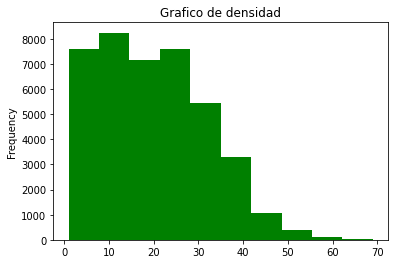

In [16]:
fig, ax=plt.subplots()
ax.hist(df["tag_conteo"], color="green")
ax.set_title("Grafico de densidad")
ax.set_ylabel("Frequency")
plt.show

## Parte 10
Mostrar un histograma de “Likes” vs “Dislikes” en color azul con su respectivo título

Text(0.5, 1.0, 'Thumbs up vs down')

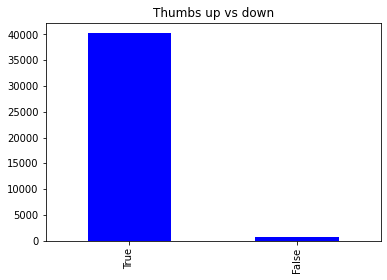

In [17]:
df["bol"].value_counts().plot.bar(color="blue").set_title("Thumbs up vs down")


## Parte 11
Mostrar una gráfica de barras con el número de veces que se presenta cada categoría, cambiar el color a rojo y ordenar de manera descendente

In [18]:
titulos=df["category_title"].unique().tolist()
titulos

['People & Blogs',
 'Entertainment',
 'Comedy',
 'Science & Technology',
 'Film & Animation',
 'News & Politics',
 'Sports',
 'Music',
 'Pets & Animals',
 'Education',
 'Howto & Style',
 'Autos & Vehicles',
 'Travel & Events',
 'Gaming',
 'Nonprofits & Activism',
 'Shows']

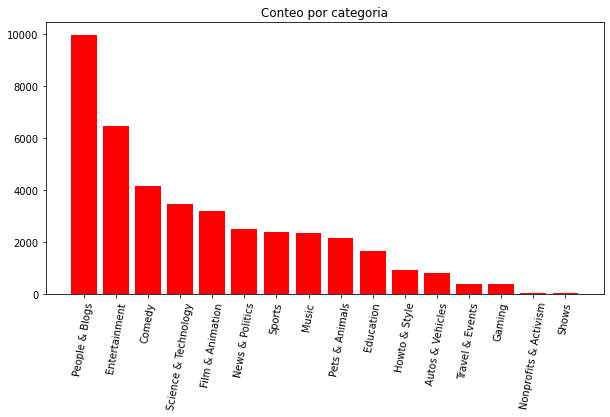

In [19]:
fig, ax= plt.subplots(figsize=(10,5))
ax.bar(titulos,height=df["category_title"].value_counts(ascending=False), color="red")
ax.set_title("Conteo por categoria")
ax.tick_params(axis="x", labelrotation=80)
plt.show()

## Parte 12
Crea una malla de 1 fila y 2 columnas con dos gráficos de puntos en escala logarítmica

“Likes” vs “Dislikes” en color rosa, semi transparente con marcadores tipo “+” con título y etiquetas en ambos ejes

“Views” vs “Comments” en color azul, semi transparente, con marcadores tipo “*” con título y etiquetas en ambos ejes


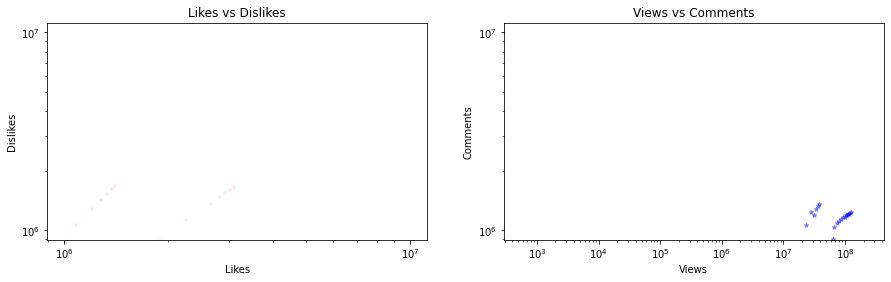

In [34]:
fig, axs=plt.subplots(1,2,figsize=(15,4))

axs[0].scatter(df["likes"],df["dislikes"], color="pink", marker="+", alpha=0.4, s=20)

axs[0].set_title("Grafica de Likes vs Dislikes")
axs[0].set_xscale("log")
axs[0].set_yscale("log")
axs[0].set_ylabel("Dislikes")
axs[0].set_xlabel("Likes")

axs[1].scatter(df["views"],df["comment_count"], color="blue", marker="*", alpha=0.4, s=20)

axs[1].set_title("Grafica de Views vs Comments")
axs[1].set_xscale("log")
axs[1].set_yscale("log")
axs[1].set_ylabel("Comments")
axs[1].set_xlabel("Views")


plt.show()

In [35]:
df.to_csv("df.csv")

In [3]:
import dash
from dash import dcc

In [ ]:
dcc.Graph(id='grafica')